# Abstract
Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

# Data description
- MSSubClass: Identifies the type of dwelling involved in the sale
- MSZoning: Identifies the general zoning classification of the sale
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access to property
- Alley: Type of alley access to property
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to various conditions
- Condition2: Proximity to various conditions (if more than one is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Rates the overall material and finish of the house
- OverallCond: Rates the overall condition of the house
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Evaluates the quality of the material on the exterior 
- ExterCond: Evaluates the present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Evaluates the height of the basement
- BsmtCond: Evaluates the general condition of the basement
- BsmtExposure: Refers to walkout or garden level walls
- BsmtFinType1: Rating of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Rating of basement finished area (if multiple types)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Bedrooms above grade (does NOT include basement bedrooms)
- Kitchen: Kitchens above grade
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality (Assume typical unless deductions are warranted)
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold (MM)
- YrSold: Year Sold (YYYY)
- SaleType: Type of sale
- SaleCondition: Condition of sale

In [1]:
# importing valuable packages 
import numpy as np  # linear algebra
import pandas as pd  # data processing
import matplotlib.pyplot as plt  # data visualization
import seaborn as sns  # data visualization
from scipy import stats  # statistics
import os  # operation system

%matplotlib inline

# Loading data

In [2]:
train_data = pd.read_csv('train.csv') # training dataset
submission_data = pd.read_csv('test.csv') # submission dataset
full_data = pd.concat([train_data, submission_data], axis = 0) 

In [3]:
print('train_data shape:', train_data.shape,
     '\ntest_data shape:', submission_data.shape,
     '\nfull_data shape:', full_data.shape)

train_data shape: (1460, 81) 
test_data shape: (1459, 80) 
full_data shape: (2919, 81)


In [4]:
full_data.head()
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

# Dealing with missing values

In [5]:
def find_missing_values(df):
    """
    param 1 df: DataFrame with missing values
    return missing_values: DataFrame that contains the number & precentage of missing values in each column
    """
    # finding the number of missing values in each column
    missing_values_count = df.isnull().sum().sort_values(ascending = False)
    missing_values_count_df = pd.DataFrame(missing_values_count[missing_values_count > 0])
    
    # finding the precentage of missing values in each column
    missing_values_precentage = missing_values_count / len(df) * 100
    missing_values_precentage_df = pd.DataFrame(missing_values_precentage[missing_values_precentage > 0])
    
    # concatenate
    missing_values = pd.concat([missing_values_count_df, missing_values_precentage_df], axis = 1)
    missing_values.columns = ['Missing Counts', 'Missing Precentage']
    
    return missing_values

In [6]:
print(find_missing_values(full_data))

              Missing Counts  Missing Precentage
PoolQC                  2909           99.657417
MiscFeature             2814           96.402878
Alley                   2721           93.216855
Fence                   2348           80.438506
SalePrice               1459           49.982871
FireplaceQu             1420           48.646797
LotFrontage              486           16.649538
GarageQual               159            5.447071
GarageYrBlt              159            5.447071
GarageFinish             159            5.447071
GarageCond               159            5.447071
GarageType               157            5.378554
BsmtExposure              82            2.809181
BsmtCond                  82            2.809181
BsmtQual                  81            2.774923
BsmtFinType2              80            2.740665
BsmtFinType1              79            2.706406
MasVnrType                24            0.822199
MasVnrArea                23            0.787941
MSZoning            

Columns to drop:
Following the results I'll drop PoolQC, MiscFeature, Alley, Fence and FireplaceQu columns as the precentage of missing values is very high.
I'll not drop SalePrice column as the high precentage of missing values it's beacuse I perfom find_missing_values() function on full data.

Columns to modify:
1. Replacing with 'NA' / 'None':
   - BsmtExposure, BsmtCond, BsmtQual, BsmtFinType2 and BsmtFinType1 --> filling the missing values with 'NA' as we can     understand from the data that there is no basement for those houses.
   - GarageQual, GarageFinish, GarageCond ans GarageType --> filling the missing values with 'NA' as we can understand from the data that there is no garage for those houses.
   - MasVnrType
   
2. Replacing with zero:
   - BsmtFullBath, BsmtHalfBath, TotalBsmtSF, BsmtUnfSF, BsmtFinSF1 and BsmtFinSF2
   - GarageCars, GarageYrBlt and GarageArea
   - MasVnrArea

3. Replacing with the mode:
   - Electrical
   - Functional
   - MSZoning
   - SaleType
   - Exterior1st
   - Exterior2nd
   - KitchenQual
   - Utilities
   
4. Replacing with the median:
   - LotFrontage --> finding the median of LotFrontage in the specific neighborhood 

In [7]:
def dealing_with_missing_values(df):
    """
    param 1 df: DataFrame with missing values
    return clean_data: DataFrame without missing values
    """
    
    # drop columns
    df = df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis = 1)
    
    # columns modifying
    bsmt_object_list = ['BsmtExposure', 'BsmtCond', 'BsmtQual', 'BsmtFinType1', 'BsmtFinType2']
    garage_object_list = ['GarageQual', 'GarageCond', 'GarageFinish', 'GarageType']
    df[bsmt_object_list] = df[bsmt_object_list].fillna('NA')
    df[garage_object_list] = df[garage_object_list].fillna('NA')
    df['MasVnrType'] = df['MasVnrType'].fillna('None')
    
    bsmt_replace_to_zero = ['BsmtFullBath', 'BsmtHalfBath', 'TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF1', 'BsmtFinSF2']
    garage_replace_to_zero = ['GarageCars', 'GarageYrBlt', 'GarageArea']
    df[bsmt_replace_to_zero] = df[bsmt_replace_to_zero].fillna(0)
    df[garage_replace_to_zero] = df[garage_replace_to_zero].fillna(0)
    df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
    
    df['Electrical'] = df['Electrical'].fillna(df['Electrical'].value_counts().idxmax())
    df['Functional'] = df['Functional'].fillna(df['Functional'].value_counts().idxmax())
    df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].value_counts().idxmax())
    df['SaleType'] = df['SaleType'].fillna(df['SaleType'].value_counts().idxmax())
    df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].value_counts().idxmax())
    df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].value_counts().idxmax())
    df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].value_counts().idxmax())
    df['Utilities'] = df['Utilities'].fillna(df['Utilities'].value_counts().idxmax())
    
    df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
    
    return df

In [8]:
full_data = dealing_with_missing_values(full_data)

In [9]:
# As I noticed before, we can ignore the missing values in SalePrice column because they coming from the test data set
find_missing_values(full_data)

,Missing Counts,Missing Precentage
SalePrice,1459,49.982871


In [10]:
full_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000.0


# Data types

In [11]:
data_types = pd.DataFrame(full_data.dtypes)
data_types.columns = ['DataType']
data_types['CountUnique'] = [full_data[col].nunique() for col in full_data.columns]
data_types['UniqueExamples'] = [full_data[col].unique()[0:10] for col in full_data.columns]

In [12]:
data_types

,DataType,CountUnique,UniqueExamples
Id,int64,2919,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]"
MSSubClass,int64,16,"[60, 20, 70, 50, 190, 45, 90, 120, 30, 85]"
MSZoning,object,5,"[RL, RM, C (all), FV, RH]"
LotFrontage,float64,130,"[65.0, 80.0, 68.0, 60.0, 84.0, 85.0, 75.0, 51...."
LotArea,int64,1951,"[8450, 9600, 11250, 9550, 14260, 14115, 10084,..."
...,...,...,...
MoSold,int64,12,"[2, 5, 9, 12, 10, 8, 11, 4, 1, 7]"
YrSold,int64,5,"[2008, 2007, 2006, 2009, 2010]"
SaleType,object,9,"[WD, New, COD, ConLD, ConLI, CWD, ConLw, Con, ..."
SaleCondition,object,6,"[Normal, Abnorml, Partial, AdjLand, Alloca, Fa..."


Now I'll divide the columns to categorial and numerical.

In [13]:
categorial = data_types[data_types['DataType'] == 'object'].index
numerical = data_types[data_types['DataType'] != 'object'].index
numerical = numerical.drop(['SalePrice', 'Id'])  # dropping Id and SalePrice from numerical columns list
categorial, numerical

(Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
        'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
        'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
        'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
        'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
        'PavedDrive', 'SaleType', 'SaleCondition'],
       dtype='object'),
 Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
        'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
        'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
        'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
        'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
        'G

# One hot encoding

In [14]:
categorial_to_numerical = pd.get_dummies(full_data[categorial], drop_first=True)
categorial_to_numerical.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


Now I can concatante between full_data and categorial_to_numerical and remove all categorial columns. 

In [15]:
full_data = pd.concat([full_data, categorial_to_numerical], axis = 1)
full_data.drop(categorial, axis = 1, inplace = True)

# Dividing into original train and test dataset

In [16]:
train_data_fixed = full_data[:1460].copy()
submission_data_fixed = full_data[1460:].copy()
submission_data_fixed.drop('SalePrice', axis = 1, inplace = True)
print('train_data shape:', train_data.shape,
     '\nsubmission_data shape:', submission_data.shape)

train_data shape: (1460, 81) 
submission_data shape: (1459, 80)


# Exploratory Data Analysis (EDA)
The analysis is based on the training data before it was cleaned.

In [17]:
train_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

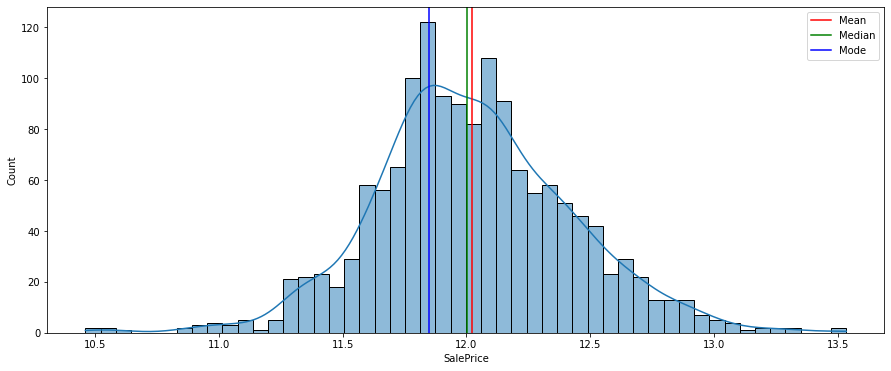

In [18]:
plt.figure(figsize=(15, 6))
sns.histplot(x=np.log1p(train_data['SalePrice']), kde=True, bins=50)
plt.axvline(x=np.log1p(train_data['SalePrice']).mean(), color='red', label='Mean')
plt.axvline(x=np.log1p(train_data['SalePrice']).median(), color='green', label='Median')
plt.axvline(x=np.log1p(train_data['SalePrice']).mode().mean(), color='blue', label='Mode')
plt.legend()
plt.show()

In [19]:
print('Skewness:', train_data['SalePrice'].skew())
print('Kurtosis:', train_data['SalePrice'].kurt())
     

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


As we can see 'SalePrice' is deviate from normal distribution and have appreciable positive skweness.
Let's investigate the relationships of 'SalePrice' with numerical variables.

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

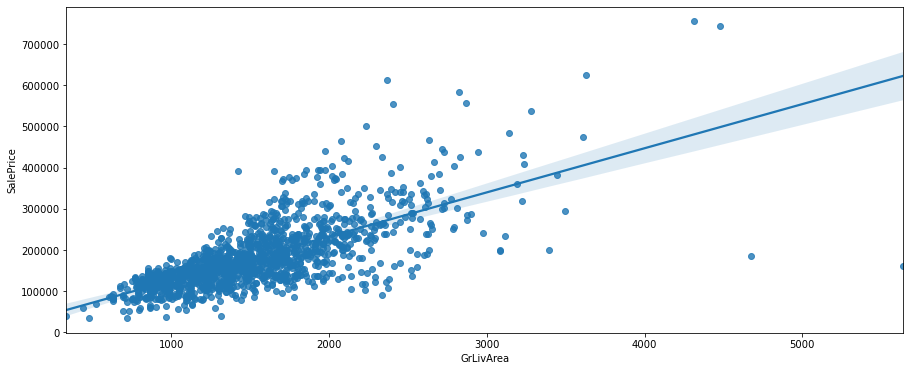

In [20]:
plt.figure(figsize=(15, 6))
sns.regplot(x = 'GrLivArea', y = 'SalePrice', data = train_data)

In [21]:
pearson = stats.pearsonr(train_data['SalePrice'], train_data['GrLivArea'])
print('Pearsin_coefficiant:', pearson[0],
     '\nP-value:', pearson[1])

Pearsin_coefficiant: 0.708624477612652 
P-value: 4.518033646780971e-223


According to the regression plot and Pearson'n correlation coefficient it can be concluded that 'SalePrice' and 'GrLivArea' have a positive linear realationship.

C:\Users\kazin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalePrice', ylabel='TotalBsmtSF'>

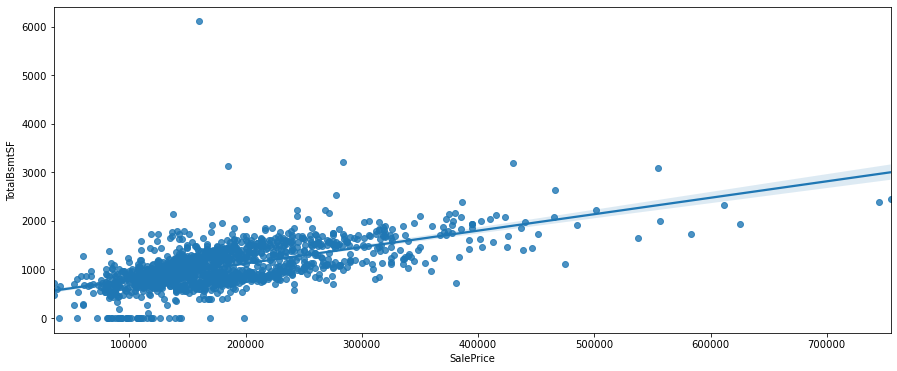

In [22]:
plt.figure(figsize=(15, 6))
sns.regplot(train_data['SalePrice'], train_data['TotalBsmtSF'])

In [23]:
pearson1 = stats.pearsonr(train_data['SalePrice'], train_data['TotalBsmtSF'])
print('Pearsin_coefficiant:', pearson1[0],
     '\nP-value:', pearson1[1])

Pearsin_coefficiant: 0.6135805515591954 
P-value: 9.484229391507914e-152


According to the regression plot and Pearson'n correlation coefficient it can be concluded that 'SalePrice' and 'TotalBsmtSF' have a positive linear realationship.

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

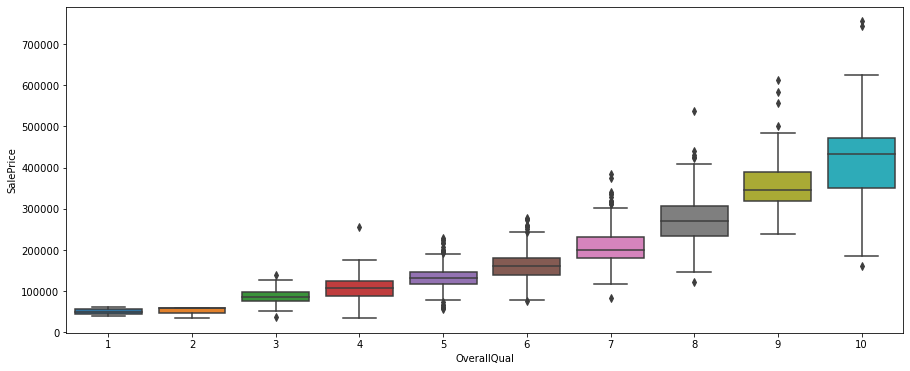

In [24]:
plt.figure(figsize=(15, 6))
sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = train_data)

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

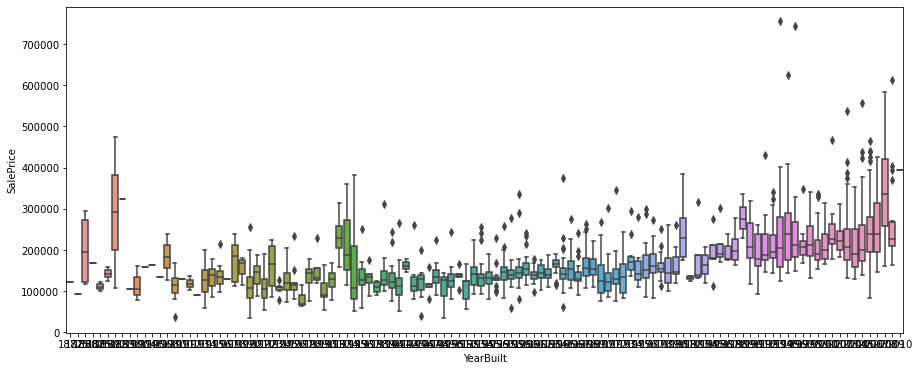

In [25]:
plt.figure(figsize=(15, 6))
sns.boxplot(x = 'YearBuilt', y = 'SalePrice', data = train_data)

 
   - 'GrLivArea' and 'TotalBsmtSF' seem to be linearly related with 'SalePrice'. Both relationships are positive, which means that as one variable increases, the other also increases. In the case of 'TotalBsmtSF', we can see that the slope of the linear relatioship is particularly high.
   - 'OverallQual' and 'YearBuilt' also seem to be related with 'SalePrice'. The relationship seems to be stronger in the case of 'OverallQual', where the boxplot shows how sales prices increase with the overall quality.

In [26]:
correlation_metrics = train_data.corr()

In [27]:
correlation_metrics.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982


<AxesSubplot:>

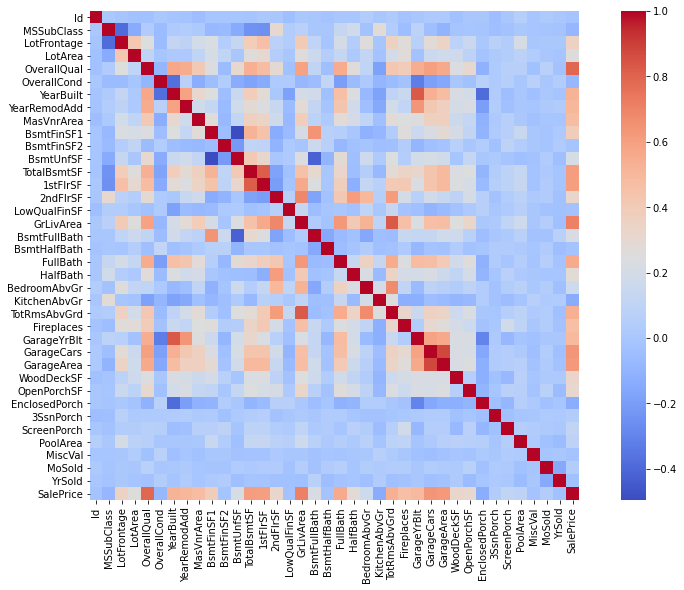

In [28]:
# heatmap
plt.figure(figsize=(15, 9))
sns.heatmap(correlation_metrics, square = True, cmap = 'coolwarm')

At first sight, there where two red colored squares that get my attention. The first one refers to the 'TotalBsmtSF' and '1stFlrSf' variables. The second one refers to the 'GarageCars' and 'GarageArea' variables. Both cases show how significant the correlation is between these variables. Actually, this correlation is so strong that it can indicate a situation of multicollinearity. If we think about these variables, we can conclude that they give almost the same information so multicollinearity really occurs.

Anothe thing that got my attention was the 'SalePrice' correlations.

In [29]:
# creating smaller correlation metrics
num_of_variables = 10
columns = correlation_metrics.nlargest(num_of_variables, 'SalePrice')['SalePrice'].index
df_corr_saleprice = pd.DataFrame(train_data[columns].corr())

<AxesSubplot:>

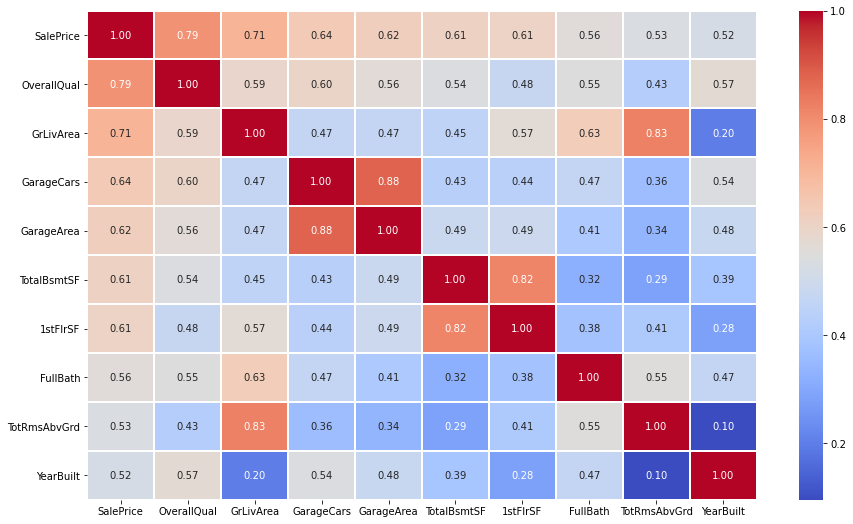

In [30]:
plt.figure(figsize=(15, 9))
sns.heatmap(df_corr_saleprice, annot = True, cmap = 'coolwarm', linecolor = 'white', linewidth = 1, fmt = '.2f')

According to the heatmap, these are the variables most correlated with 'SalePrice':
- 'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'
- 'GarageCars' and 'GarageArea' are also of the most strongly correlated with 'SalePrice'. However, the number of cars that fit into the garage is consequence of the garage area. Therefore, I'll focus only on one variable, in this case I'll use 'GarageCars' since its correlation with 'SalePrice' is higher.
- 'TotalBsmtSF' and '1stFlrSF' seems to be strongly correlated with 'SalePrice'. As I discussed in the last sub-point, multicollinearity appears between these variables. Therefore, I'll focuse only on the 'TotalBsmtSF' variable.
- 'TotRmsAbvGrd' and 'GrLivArea' are "twins" brothers again, I'll use 'GrLivArea' since its correlation with 'SalePrice' is higher.
- 'FullBath'
- 'YearBuilt' is slightly correlated with 'SalePrice'. 

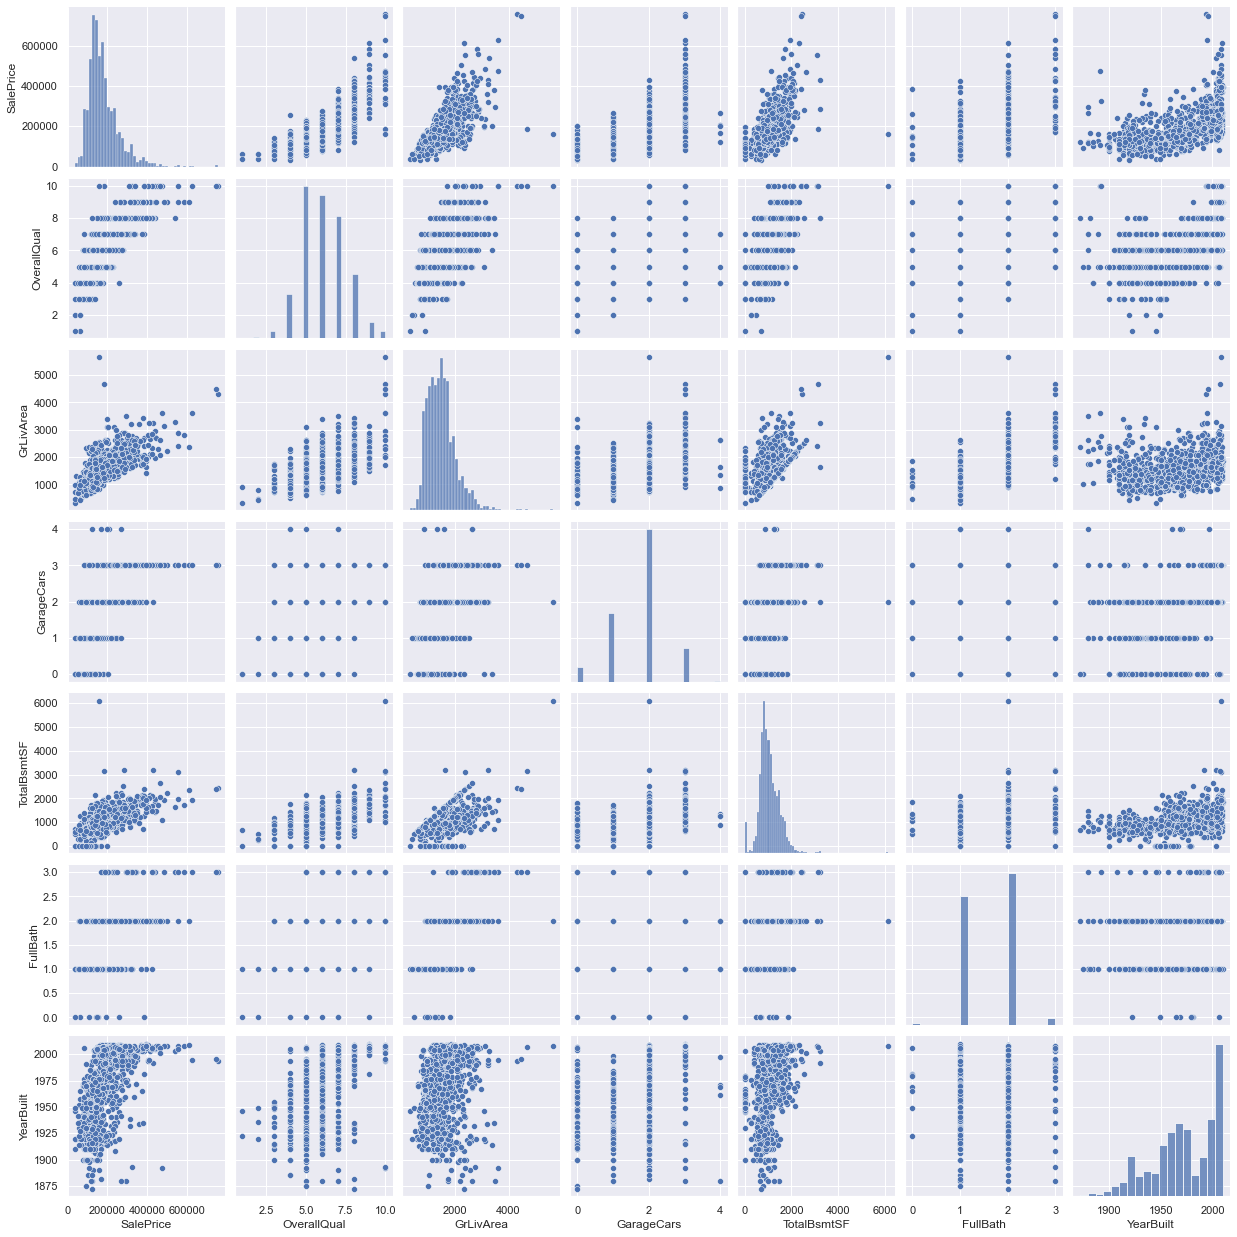

In [31]:
# scatterplot
sns.set()
columns = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_data[columns])

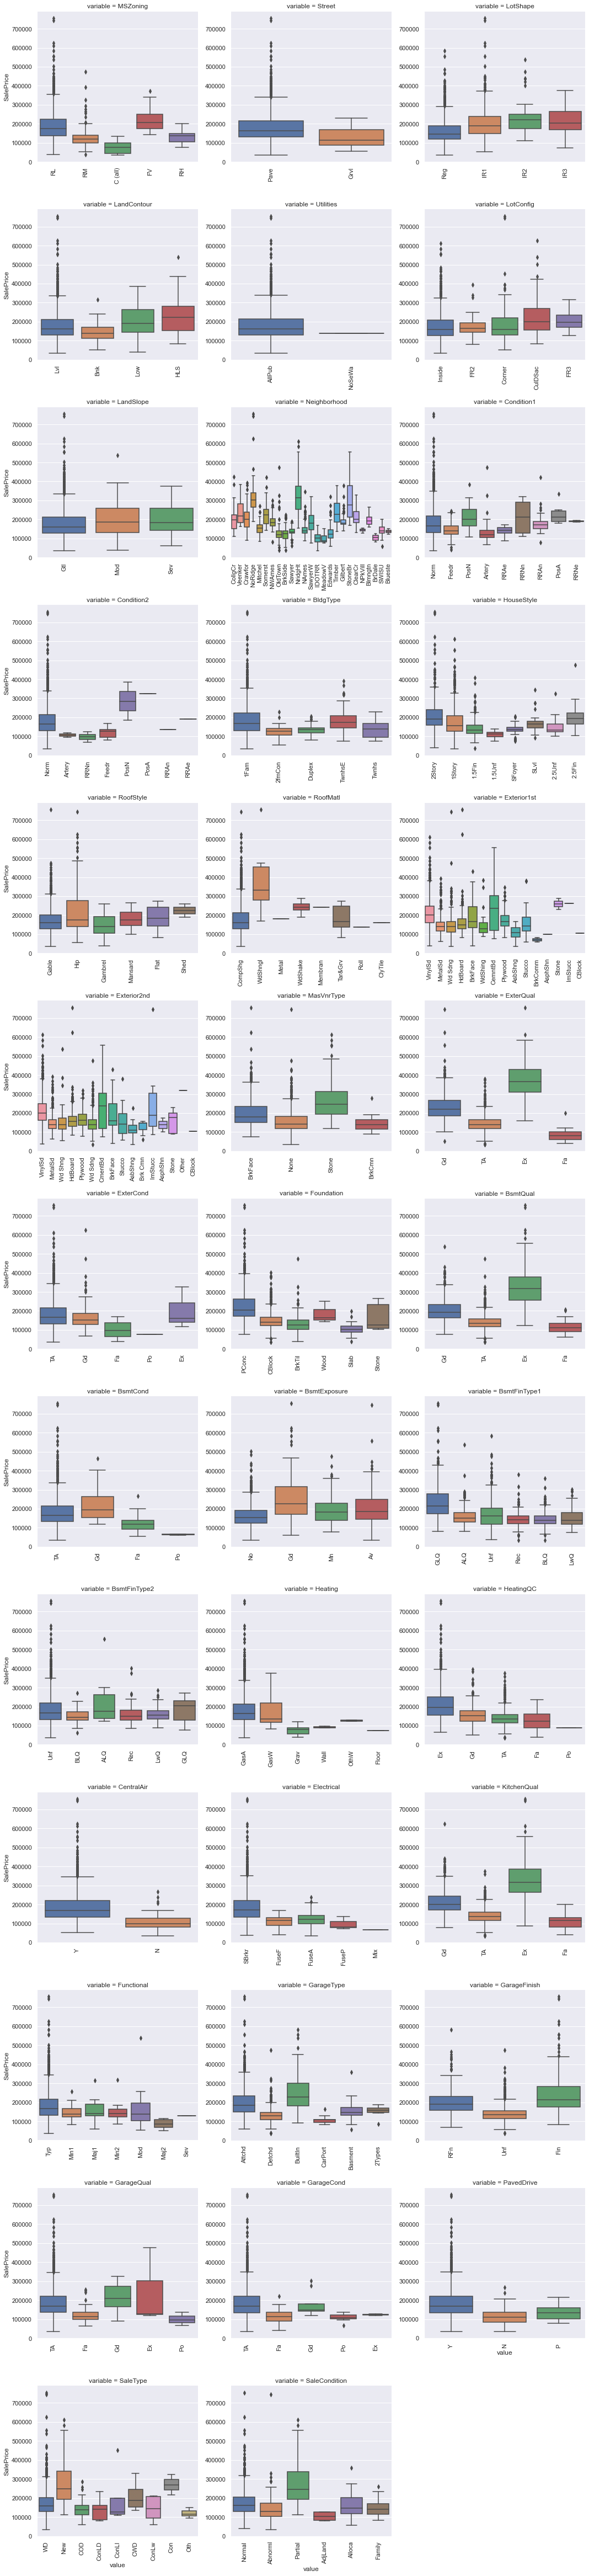

In [32]:
# boxplots for all categorial variables
for c in categorial:
    train_data[c] = train_data[c].astype('category')
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
#create a box plot to show how the output changes with qualitative features
f = pd.melt(train_data, id_vars=['SalePrice'], value_vars=categorial)
g = sns.FacetGrid(f, col= "variable",  col_wrap=3, sharex=False, sharey=False, height=5)
g = g.map(boxplot, "value", "SalePrice")

# Model development
I'll develop two models to make predictions, the models are:
- Linear regression
- Ridge regression

Pursuant to the multicollinearity between several variables in the dataset I guess that the Ridge regression model will make the best predictions due to the fact that ridge regression is a technique for analyzing multiple regression data that suffer from multicollinearity. 

In [33]:
# I'll use this function to estimate the model by visualization tools
def distribution_plot(red_func, blue_func, red_name, blue_name, title):
    """
    param 1 red_func: actual values of SalePrice
    param 2 blue_func: predicted values for SalePrice
    param red_name: name of red_func
    param blue_name: name of blue_func
    param title: plot title
    return: displays kde line for predicted values compared to actual values
    """
    width = 12
    height = 10
    plt.figure(figsize = (width, height))
   
    
    ax1 = sns.distplot(red_func, hist = False, color = 'r', label = red_name) # hist = false because I want only the KDE line
    ax2 = sns.distplot(blue_func, hist = False, color = 'b', label = blue_name, ax = ax1)
    
    plt.title(title)
    plt.xlabel('Sale Price (in dollars)')
    plt.ylabel('Proportion of houses')
    plt.legend()
    
    plt.show()
    plt.close()

In [34]:
X_data = train_data_fixed.drop(['SalePrice', 'Id', 'GarageArea', '1stFlrSF', 'TotRmsAbvGrd'], axis = 1)
y_data = train_data_fixed.SalePrice
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.25, random_state = 1)

In [35]:
# linear regression model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
yhat_lm = lm.predict(X_test)

print('R-squared for train data:', lm.score(X_train, y_train))
print('R-squared for test data:', lm.score(X_test, y_test))

R-squared for train data: 0.9327151283370587
R-squared for test data: 0.7035945149967499


C:\Users\kazin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\kazin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


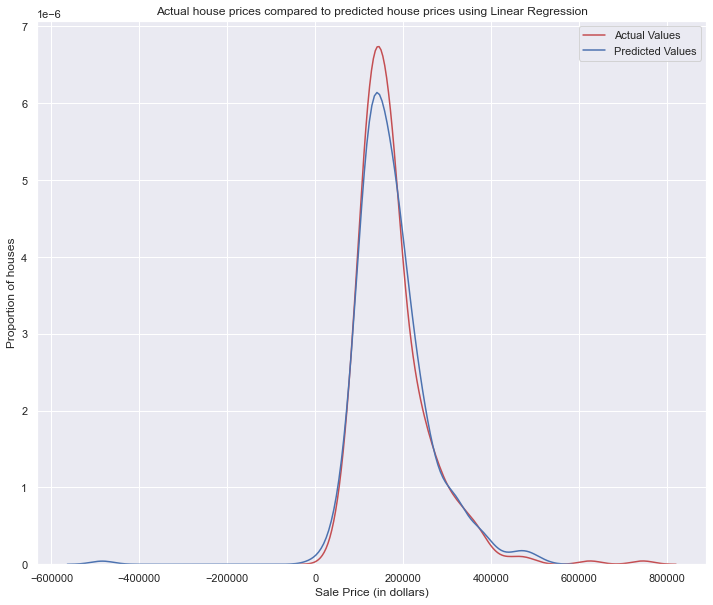

In [36]:
distribution_plot(y_test, yhat_lm, 'Actual Values', 'Predicted Values', 'Actual house prices compared to predicted house prices using Linear Regression')

In [37]:
# finding the best hyperparametr 'alpha' for ridge regression model
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
                 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
                 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]
         }


ridge = Ridge()

folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_squared_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)    

model_cv.fit(X_train, y_train) 


Fitting 5 folds for each of 26 candidates, totalling 130 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:    1.6s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [38]:
ridge = model_cv.best_estimator_
ridge

Ridge(alpha=10.0)

In [39]:
yhat_ridge_train = ridge.predict(X_train)
print('R-squared for train data:' ,r2_score(y_true = y_train, y_pred = yhat_ridge_train))

R-squared for train data: 0.8919408284859996


In [40]:
yhat_ridge_test = ridge.predict(X_test)
print('R-squared for test data:',r2_score(y_true = y_test, y_pred = yhat_ridge_test))

R-squared for test data: 0.8684222628950711


C:\Users\kazin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\kazin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


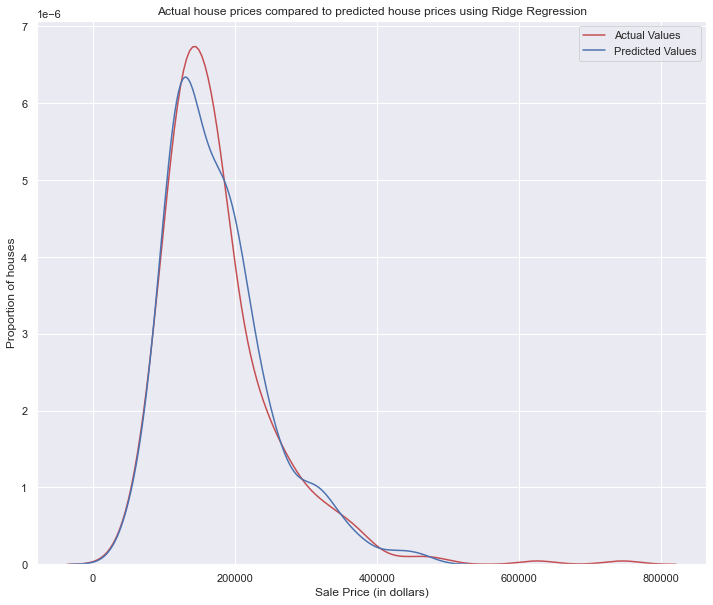

In [41]:
distribution_plot(y_test, yhat_ridge_test, 'Actual Values', 'Predicted Values', 'Actual house prices compared to predicted house prices using Ridge Regression')

As I gussed ridge regression model's predictions was more accurate than linear regression model's predictions. Therfore I'll submit my predictions based on ridge regression model.

# Submission to Kaggle

In [42]:
# the features here are the same features that I used in the training dataset
X_submission_data = submission_data_fixed.drop(['Id', 'GarageArea', '1stFlrSF', 'TotRmsAbvGrd'], axis = 1)
X_submission_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,0,0,1,0,0,0,1,0
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,0,0,1,0,0,0,1,0
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,0,0,1,0,0,0,1,0


In [43]:
# make predictions
yhat_submission = ridge.predict(X_submission_data)

In [44]:
submission_data_fixed['SalePrice'] = yhat_submission
submission_data_fixed.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,0,0,0,1,0,0,0,1,0,96810.345151
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,0,0,0,1,0,0,0,1,0,151438.047641
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,0,0,0,1,0,0,0,1,0,173209.077354
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,0,0,0,1,0,0,0,1,0,189257.899912
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,0,0,0,1,0,0,0,1,0,205676.606144


In [45]:
submission_data_fixed.to_csv('my_submission.csv', index = False)